<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Tutorial 01: Create and Visualize<center>

<font size = "3"><font color='blue'>During this tutorial you will learn how to: 
    
<font size = "3"><font color='blue'>- Build a neuron morphology step-by-step with NEURON 
    
<font size = "3"><font color='blue'>- Load a complex neuronal morphology in NEURON
    
<font size = "3"><font color='blue'>- Visualize morphologies with NeuroM

# 1. Build a neuron morphology with Neuron

 ## What is NEURON?
 
 <font size = "3"> The NEURON simulation environment is a powerful engine for performing simulations of neurons and biophysical neural networks. It allows the construction of biologically realistic membranes with active and passive ion channels, combined with virtual connectivity and electrophysiology tools to drive and measure single neurons and network behavior.

<font size = "3">You can take a look to the online guides and tutorials here - [NEURON](https://www.neuron.yale.edu/neuron/docs)

NEURON was originally implmented in the HOC programming language but now has an additional Python interface.

The cryptically named module neuron.h is the top-level HocObject, allowing interaction between Python and Hoc.

In [1]:
from neuron import h
help(h)

--No graphics will be displayed.



NEURON+Python Online Help System



neuron.h

neuron.h is the top-level HocObject, allowing interaction between Python and Hoc.

It is callable like a function, and takes Hoc code as an argument to be executed.

The top-level Hoc namespace is exposed as attributes to the h object.

Ex:

    >>> h = neuron.h
    >>> h("objref myvec")
    >>> h("myvec = new Vector(10)")
    >>> h.myvec.x[0]=1.0
    >>> h.myvec.printf()
    1       0       0       0       0
    0       0       0       0       0


NEURON classes are defined in the h namespace and can be constructed as follows:

>>> v = h.Vector(10)
>>> soma = h.Section()
>>> input = h.IClamp(soma(0.5))

More help on individual classes defined in Hoc and exposed in Python
is available using Jupyter's online help feature

In []: ? h.Section

or in standard Python by python help system

>>> help(h.Vector)

For a list of symbols defined in neuron.h try:

>>> dir(neuron.h)



NOTE: Several Hoc symbols are not useful in Python, and thus raise a


## What is NeuroM?
 
<font size = "3">NeuroM is a Python toolkit for the analysis and processing of neuron morphologies. 
You can find all the documentation here - [NeuroM](https://neurom.readthedocs.io/en/v1.4.17/quickstart.html )

In [2]:
!pip install neurom

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 8.4 MB/s eta 0:00:0000:0100:01m


In [3]:
import neurom
help(neurom)

Help on package neurom:

NAME
    neurom - NeuroM neurom morphology analysis package.

DESCRIPTION
    Examples:
        Load a morphology

        >>> import neurom as nm
        >>> m = nm.load_morphology('tests/data/swc/Neuron.swc')

        Obtain some morphometrics using the get function

        >>> ap_seg_len = nm.get('segment_lengths', m, neurite_type=nm.APICAL_DENDRITE)
        >>> ax_sec_len = nm.get('section_lengths', m, neurite_type=nm.AXON)

        Load morphologies from a directory. This loads all SWC, HDF5 or NeuroLucida .asc
        files it finds and returns a list of morphologies

        >>> import numpy as np  # For mean value calculation
        >>> pop = nm.load_morphologies('tests/data/valid_set')
        >>> mean_section_lengths = [np.mean(nm.get('section_lengths', m)) for m in pop]

        Apply a function to a selection of neurites in a morphology or morphology population.
        This example gets the number of points in each axon in a morphology population

# Ball and stick model

A simplified representation of pyramidal cell morphology is to have one cylindrical section for the soma, one for the apical dendrite, and one for the axon.

<img src="doc/SimplifiedNeuronShapes.png" width="1100">

Now we are going to build a ball and stick model step by step in Neuron.

In [4]:
soma = h.Section(name="soma")  # section representing the cell body

[**Sections**](https://www.neuron.yale.edu/neuron/static/new_doc/modelspec/programmatic/topology/geometry.html) are unbranched lengths of continuous cable connected together to form a neuron. Sections can be connected to form any tree-shaped structure but loops are not permitted. (You may, however, develop membrane mechanisms, such as electrical gap junctions which do not have the loop restriction. But be aware that the electrical current flows through such connections are calculated by a modified euler method instead of the more numerically robust fully implicit/crank-nicholson methods)

_Do not confuse sections with **segments**_! Sections are divided into segments of equal length for numerical simulation purposes (see [nseg](https://www.neuron.yale.edu/neuron/static/new_doc/modelspec/programmatic/topology.html#nseg)). Such segments are similar to compartments in compartmental modeling programs.

In [5]:
# the h.psection() function prints information on the existing sections
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
}


1.0

Section.psection gives us the info of the specific section instance

In [6]:
soma.psection()

{'point_processes': {},
 'density_mechs': {},
 'ions': {},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x7f7e5f115000',
 'cell': None}

calling a section with a number between 0 and 1 will return a __Segment__, representing a point along the cylinder

In [7]:
print(soma(1))
print(soma(0.75).x)
print(help(soma(0.5)))
soma(1.1) # will raise an error, as 0 and 1 are the ends of the section

soma(1)
0.75
Help on Segment in module nrn object:

class Segment(builtins.object)
 |  Segment objects
 |
 |  Methods defined here:
 |
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __hash__(self, /)
 |      Return hash(self).
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __iter__(self, /)
 |      Implement iter(self).
 |
 |  __le__(self, value, /)
 |      Return self<=value.
 |
 |  __lt__(self, value, /)
 |      Return self<value.
 |
 |  __ne__(self, value, /)
 |      Return self!=value.
 |
 |  __repr__(self, /)
 |      Return repr(self).
 |
 |  __setattr__(self, name, value, /)
 |      Implement setattr(self, name, value).
 |
 |  area(...

ValueError: segment position range is 0 <= x <= 1

# Connecting sections
Let's try adding some neurites.

The Section.connect method connects one __Section__ to a __Segment__.
So `dend.connect(soma(1))` below connects the section dend to the very end of soma 

In [8]:
# Define all the sections first
dend = h.Section(name="dendrite")
axon = h.Section(name="axon")

# Topology
dend.connect(soma(1))
axon.connect(soma(0))

# Geometry
# Since NEURON deals with many different sections each with their own unique name,
# we must tell NEURON which section we are working on when we want to access a section parameter.

soma.L = soma.diam = 15  # microns
dend.L = 50
dend.diam = 1
dend.nseg = 3
axon.diam = 3
axon.L = 100
axon.nseg = 5


# NEURON's h.topology() function displays the topological structure of the entire model, indicating which sections
# are connected to which sections, where they are connected, and how many segments each section is divided into.
h.topology()
help(h.define_shape)


|-|       soma(0-1)
   `--|       dendrite(0-1)
 `----|       axon(0-1)


NEURON+Python Online Help System

Syntax:
    ``h.define_shape()``


Description:
    Fill in empty pt3d information with a naive algorithm based on current 
    values for *L* and *diam*. Sections that already have pt3d info are 
    translated to ensure that their first point is at the same location 
    as the parent. But see :func:`pt3dstyle` with regard to the use of 
    a logical connection point if the translation ruins the 
    visualization. 


    Note: This may not work right when a branch is connected to 
    the interior of a parent section \ ``0 < x < 1``, 
    rather only when it is connected to the parent at 0 or 1. 



NeuroM can show us a clearer visualzation, but first we have to save the morphology to disc with neuron2swc

In [9]:
import neurom as nm
from neurom import view
import matplotlib.pyplot as plt
from hoc2swc import neuron2swc

Wrote cell 0 to ./output/cell_01.swc


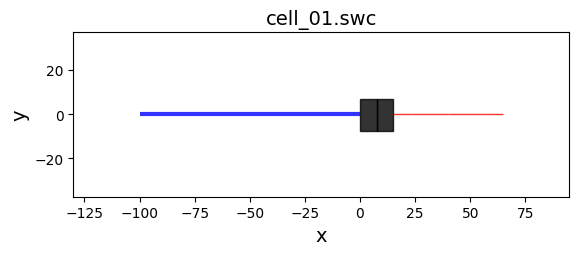

In [14]:
# In Noto
# save hoc object into swc file
neuron2swc("./output/cell_01.swc", swap_yz=False)
# Open the swc and plot with NeuroM viewer
neuron1 = nm.load_morphology("./output/cell_01.swc")
#fig, ax = plt.subplots()
view.plot_morph(neuron1)


In [15]:
# delete references to variables, they are then garbage collected and topology() should be empty
del dend
del axon
del soma
del neuron1
h.topology()


|-|       soma(0-1)



1.0

## Creating a geometrically complex model

In [16]:
import neurom as nm
from neurom import view
from neuron import h
from hoc2swc import neuron2swc

In [17]:
# Defining the sections
my_soma = h.Section(name="my_soma")
main_dend = h.Section(name="main_dend")
my_axon = h.Section(name="my_axon")

# Geometry
my_soma.L = my_soma.diam = 15
main_dend.L = 100
main_dend.diam = 5
my_axon.L = 200
my_axon.diam = 7

# Topology
main_dend.connect(my_soma(1))
my_axon.connect(my_soma(0))
nbranches = 3
branches = []
for i in range(nbranches):
    branch = h.Section(name=f"branch {i}")
    branch.L - 50
    branch.diam = 3
    branch.connect(main_dend(1))
    branches.append(branch) 

h.topology()  # Check the topology


|-|       soma(0-1)
|-|       my_soma(0-1)
   `|       main_dend(0-1)
     `|       branch 0(0-1)
     `|       branch 1(0-1)
     `|       branch 2(0-1)
 `|       my_axon(0-1)



1.0

Wrote cell 0 to ./output/cell_02_0000.swc
Wrote cell 1 to ./output/cell_02_0001.swc


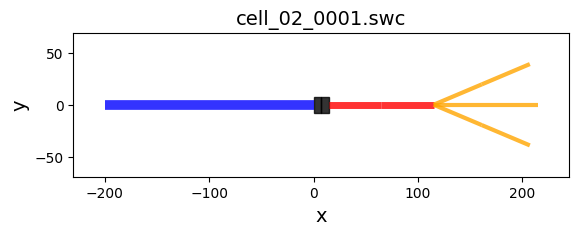

In [21]:
neuron2swc('./output/cell_02.swc', swap_yz=False)
neuron2 = nm.load_morphology('./output/cell_02_0001.swc')
view.plot_morph(neuron2);

### Create another neuron model example with crazy values

#### <font color='red'>PLEASE RESTART YOU KERNEL!!!!

In [1]:
from neuron import h
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc

--No graphics will be displayed.


In [2]:
# Instantiate the new model

# sections
soma = h.Section(name="soma")
papic = h.Section(name="proxApical")
apic1 = h.Section(name="apic1")
apic2 = h.Section(name="apic2")
pb = h.Section(name="proxBasal")
db1 = h.Section(name="distBasal1")
db2 = h.Section(name="distBasal2")

# Geometry - crazy values
soma.L = soma.diam = 30
papic.L = 200
papic.diam = 10
apic1.L = 100
apic1.diam = 7
apic2.L = 300
apic2.diam = 5
pb.L = 60
pb.diam = 4
db1.L = 80
db1.diam = 5
db2.L = 70
db2.diam = 2

# connect sections
papic.connect(soma)
pb.connect(soma(0))
apic1.connect(papic)
apic2.connect(papic)
db1.connect(pb)
db2.connect(pb)
h.topology()


|-|       soma(0-1)
   `|       proxApical(0-1)
     `|       apic1(0-1)
     `|       apic2(0-1)
 `|       proxBasal(0-1)
   `|       distBasal1(0-1)
   `|       distBasal2(0-1)



1.0

Wrote cell 0 to output/cell_03.swc


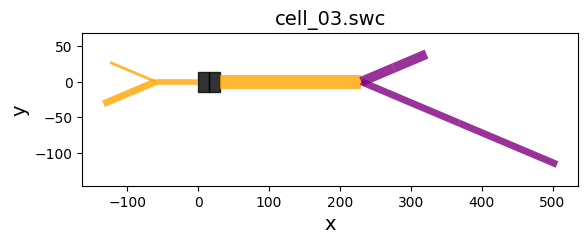

In [3]:
# Visualize in Noto
neuron2swc('output/cell_03.swc', swap_yz=False)
neuron3 = nm.load_morphology('output/cell_03.swc')
view.plot_morph(neuron3);

# In your laptop
# Visualize in the Neuron GUI
# Show sections in different colors
#s.show(False)
#s.color(1, sec=papic) 
#s.color(2, sec=pb)
#s.color(3, sec=apic1)
#s.color(3, sec=apic2)
#s.color(4, sec=db1) 
#s.color(4, sec=db2) 
#s = h.Shape()

### Using for-loops to create more complex morphologies

#### <font color='red'>PLEASE RESTART YOU KERNEL!!!!

In [1]:
from neuron import h
import numpy as np
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc

--No graphics will be displayed.


In [2]:
# Pro tip: the same thing can also be done by using a list comprehension!!
# A list comprehension is conceptually the same as a for loop
soma, dend1, db1, db2, axon = [
    h.Section(name=n) for n in ["soma", "dend1", "dend_branch1", "dend_branch2", "axon"]
]

# Geometry
for sec in h.allsec():
    sec.nseg = 10
    sec.L = 100
    for seg in sec:
        seg.diam = np.interp(seg.x, [0, 1], [1, 10])

# connect sections
dend1.connect(soma(1))
db1.connect(dend1(1), 0)
db2.connect(dend1)
axon.connect(soma(0))
h.topology()


|----------|       soma(0-1)
            `---------|       dend1(0-1)
                       `---------|       dend_branch1(0-1)
                       `---------|       dend_branch2(0-1)
 `---------|       axon(0-1)



1.0

Wrote cell 0 to output/cell_05.swc


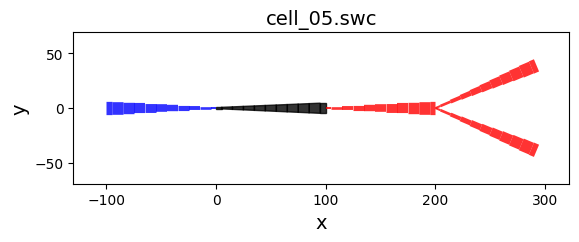

In [3]:
# Visualize in Noto
neuron2swc('output/cell_05.swc', swap_yz=False)
neuron4 = nm.load_morphology('output/cell_05.swc')
view.plot_morph(neuron4)

# In your laptop
# Visualize in the Neuron GUI
#s.show(False)
#s = h.Shape()

### Create a neuron class

#### <font color='red'>PLEASE RESTART YOU KERNEL!!!!

In [1]:
from neuron import h
import numpy as np
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc

--No graphics will be displayed.


In [2]:
class BallAndStick:
    def __init__(self, gid):
        self._gid = gid
        self.soma = h.Section(name="soma", cell=self)
        self.dend = h.Section(name="dend", cell=self)
        self.dend.connect(self.soma)
        self.soma.L = (
            self.soma.diam
        ) = 12.6157  # If you're wondering why that number was chosen
        # for the soma, it's because it makes the surface area
        # (which doesn't include end faces) approximately 500 μm2:
        self.dend.L = 200
        self.dend.diam = 1

    def __str__(self):
        return "BallAndStick[{}]".format(self._gid)


my_cell = BallAndStick(0)
h.topology()


|-|       BallAndStick[0].soma(0-1)
   `|       BallAndStick[0].dend(0-1)



1.0

Wrote cell 0 to output/cell_04.swc


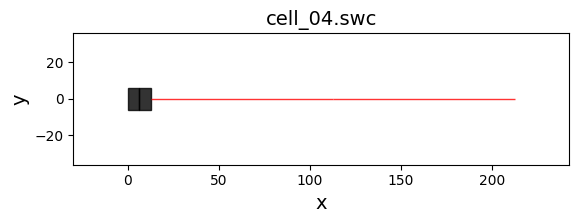

In [3]:
# Visualize in Noto
neuron2swc('output/cell_04.swc', swap_yz=False)
neuron5 = nm.load_morphology('output/cell_04.swc')
view.plot_morph(neuron5);

# 2. Load and visualize real neuronal morphologies

<font size = "3">You should change the following paths to the ones in which you have saved the files.

In [4]:
import neurom as nm
import matplotlib.pyplot as plt
from neurom import view
from neurom.view.matplotlib_utils import (
    update_plot_limits,
)  # from NeuroM we import utils function to adjust the plot limits

In [5]:
# Here are the paths to morphology files
path_to_file = "input/example_morphologies/Fluo55_low.asc"
nrn = path_to_file

<font size = "3"> First, we can check what is inside the file.

In [6]:
# compatible file formats for morphology could be: ascii, swc, hdf5
# Before ploting let's see what is inside the morphology file
neuron = nm.load_morphology(nrn)
print(neuron.name)

neurites = neuron.neurites
# print(neurites)       # Uncomment this if you want to know what are you going to iterate through.

# enumerate returns the number of the list item and the object itself
# e.g. (1, neurite1), (2, neurite2), etc.
for i, neurite in enumerate(neurites):

    # iter_sections is an iterator. It returns the values one by one every time it is called
    # therefore by applying the list function we force to return all the values.
    number_of_sections = len(list(neurite.iter_sections()))

    # points is a numpy array, where instead of len, shape is used
    # first element is the number of points, second the number of coordinates and a radius (4)
    number_of_points = neurite.points.shape[0]

    # strings to use for printing (\n = change line)
    string_neurite = "Neurite {0}:\n".format(i)
    string_type = "Type: {0}\n".format(neurite.type)
    string_n_secs = "Number of Sections: {0}\n".format(number_of_sections)
    string_n_pnts = "Number of Points: {0}\n".format(number_of_points)

    # join concatenates strings in a list by linking them with the provided string (here a tab identation \t)
    print("\t".join((string_neurite, string_type, string_n_secs, string_n_pnts)))

Fluo55_low.asc


AttributeError: 'Neurite' object has no attribute 'iter_sections'

<font size = "3">Second, we can plot the real morphological reconstruction using neurom viewer.
<font size = "3"> We will plot four different graphs: the soma, the morphology on its planes ('xy', 'xz', 'zy', the different neurites and the dendrogram of the neuron.

In [7]:
## PLOT 1
# Plot only the soma
view.plot_soma(neuron.soma, plane="xy")

AttributeError: module 'neurom.view' has no attribute 'plot_soma'

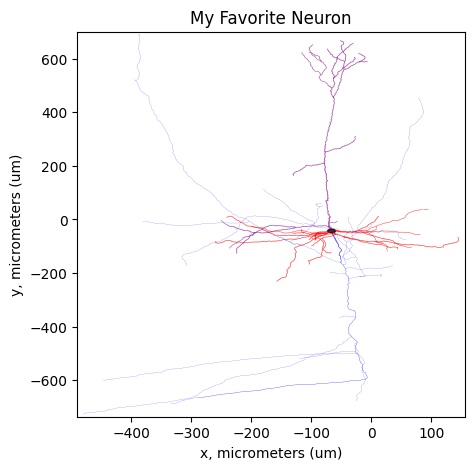

In [8]:
## PLOT 2
# Plot the morphology on a specific plane
# planes: 'xy', 'xz', 'yz'

# figure, axis = viewer.draw(neuron, mode='2d', plane='xy')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
view.plot_morph(neuron, plane="xy", ax=ax)
update_plot_limits(
    ax, white_space=10
)  # set your x, y plot limits to match with your neuron

# the axis handler is returend for further customization
ax.set_title("My Favorite Neuron")
ax.set_xlabel("x, micrometers (um)")
ax.set_ylabel("y, micrometers (um)");

AttributeError: module 'neurom.view' has no attribute 'plot_tree'

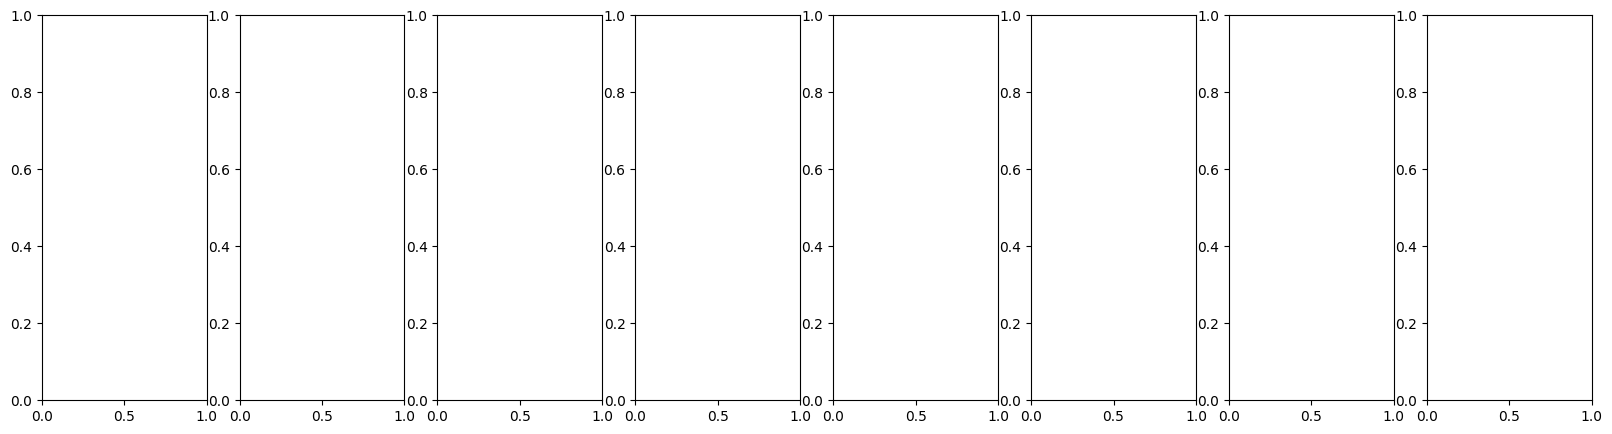

In [9]:
## PLOT 3
# Plot each of the neurites separately
N = len(neurites)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20, 5))  # figsize in inches (width, height)

for i, neurite in enumerate(neurites):
    current_axes = axes[i]
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.plot_tree(neurite, ax=current_axes, plane="xy")
    update_plot_limits(current_axes, white_space=10)

    # remove the xy axes for a prettier result
    # current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_xlabel("x (um)")
    current_axes.set_ylabel("y (um)")
    current_axes.set_title(f"neurite {i}")
    plt.tight_layout()

# set a global title for the figure
fig.suptitle(neuron.name, fontsize=20);
plt.tight_layout()

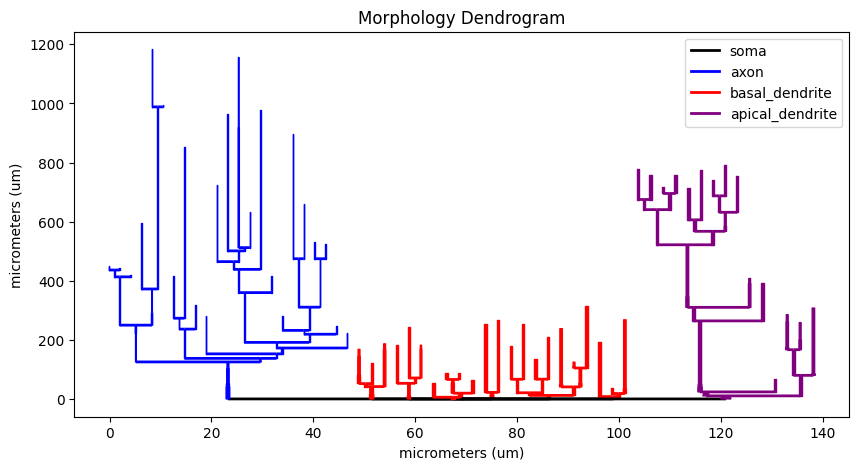

In [10]:
## PLOT 4
# Here we can create a dendrogram of our loaded morphology - showing us the
# hierarchical relationship of neurons axon, basal and apical dendrite

fig, ax = plt.subplots(figsize=(10, 5))
view.plot_dendrogram(neuron, ax=ax)